In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

filepath = "/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/models-links/"
train_df = pd.read_csv(filepath + 'radshift_links_cross_posting_info.csv')

In [7]:
predictor_vars = ['consumptions_by_type__link_clicks', 'stories_by_action_type__share']
response_vars = ['twoday_consumptions_by_type__link_clicks', 'twoday_stories_by_action_type__share']

In [14]:
# y = train_df[predictor_vars]
y = train_df[response_vars]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e83f5c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e981198>]], dtype=object)

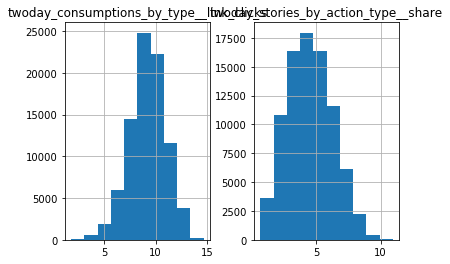

In [15]:
import numpy as np
np.log(y+1).hist()

In [21]:
print("Task 3 viz!")

Task 3 viz!


In [22]:
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

filepath = '/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/models-links/'
train_df = pd.read_csv(filepath + 'radshift-links-previous-to-next-page-info.csv')

one_hour_features = [
       'consumptions_by_type__link_clicks',
       'consumptions_by_type__other_clicks',
       'reactions_like_total',
       'stories_by_action_type__comment',
       'stories_by_action_type__like',
       'stories_by_action_type__share', 
        'engaged_fan',
       'fan_reach', 
    'impressions',
       'impressions_fan',
                ]

two_day_features = [
       'twoday_consumptions_by_type__link_clicks',
       'twoday_stories_by_action_type__share',
]

all_pages = train_df['page'].unique()
cross_promotion_features = all_pages

# train_features = one_hour_features
# print("ONLY 1 HOUR PERFORMANCE IN PREVIOUS PAGE")
# print('SHARES:')
# res = ols(y = train_df['next_shares'], x = train_df[train_features])
# print(res)
# print('CLICKS:')
# res = ols(y = train_df['next_clicks'], x = train_df[train_features])
# print(res)
# train_features = one_hour_features + page_infos# + cross_promotion_features
# for feat in cross_promotion_features:
#     train_features.append(feat)
# train_features

# from sklearn import linear_model
# clf = linear_model.LinearRegression()
# print("LINEAR REGRESSION!")

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth = 10)
print("TREE REGRESSION!")

# train_df = pd.read_csv('radshift-links-previous-to-next-page-info.csv')
# all_pages = list(train_df.page.unique())

print("Performance stats with page names, and also cross-promotion order included!")
# print("WITH cross-promotion features")

page_infos = ['page', 'next_page']

# train_features = one_hour_features
# train_features = one_hour_features + page_infos + cross_promotion_features
train_features = one_hour_features + page_infos
# train_features = cross_promotion_features + one_hour_features

log_scale = 1
# log_scale = 0

if log_scale == 1:
    for feat in one_hour_features:
        train_df[feat] = np.log(train_df[feat] + 1)

# cross_promote = 0
cross_promote = 1

if cross_promote == 1:
    for feat in cross_promotion_features:
        train_features.append(feat)
        
# train_features = two_day_features + one_hour_features + cross_promotion_features

# for feats in (one_hour_features):
#     train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

train_df['clicks_bucket'] = np.log(train_df['next_clicks'] + 1)
train_df['share_bucket'] = np.log(train_df['next_shares']+1)
# train_df['clicks_bucket'] = np.log(train_df['next_clicks'] + 1).astype(int)
# train_df['share_bucket'] = np.log(train_df['next_shares']+1).astype(int)

print("No. of data-points = ", len(train_df))

if log_scale == 0:
    print("Raw values!")
    y_clicks = train_df['next_clicks']
    y_share = train_df['next_shares']
else:
    print("Log scaled!")
    y_clicks = train_df['clicks_bucket']
    y_share = train_df['share_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]
####convert page_infos into dummies
X = pd.get_dummies(data = X, columns=['page', 'next_page'])

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

clicks_accuracy = []
clicks_error = []
shares_accuracy = []
shares_error = []

share_cv_y_test = []
share_cv_y_pred = []
clicks_cv_y_test = []
clicks_cv_y_pred = []

for train_index, test_index in kf.split(X):
#     print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    ####
    for pt in y_test:
        share_cv_y_test.append(pt)
    for pt in y_pred:
        share_cv_y_pred.append(pt)
        
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    shares_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    shares_error.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    ####
    for pt in y_test:
        clicks_cv_y_test.append(pt)
    for pt in y_pred:
        clicks_cv_y_pred.append(pt)

    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    clicks_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    clicks_error.append(error_percent)
    fold += 1
print("Shares performance: Accuracy = ", np.mean(shares_accuracy), " ; Error (/100) = ", np.mean(shares_error))
print("Clicks performance: Accuracy = ", np.mean(clicks_accuracy), " ; Error (/100) = ", np.mean(clicks_error))

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


TREE REGRESSION!
Performance stats with page names, and also cross-promotion order included!
No. of data-points =  38769
Log scaled!
Shares performance: Accuracy =  0.657464220447  ; Error (/100) =  0.212635488597
Clicks performance: Accuracy =  0.72155126642  ; Error (/100) =  0.0910447956985


R2:  0.657675207722
Error (\100):  0.212635585218
Mean:  3.41856212424
Shares!
R2:  0.721743936286
Error (\100):  0.0910447715371
Mean:  7.82726669264
Clicks!


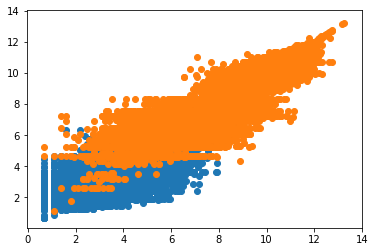

In [23]:
##share
# share_cv_y_test
# share_cv_y_pred

accuracy = metrics.r2_score(share_cv_y_test, share_cv_y_pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(share_cv_y_test, share_cv_y_pred)/np.mean(share_cv_y_test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(share_cv_y_test))
########
# accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))
print('Shares!')
plt.scatter(share_cv_y_test, share_cv_y_pred)

accuracy = metrics.r2_score(clicks_cv_y_test, clicks_cv_y_pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(clicks_cv_y_test, clicks_cv_y_pred)/np.mean(clicks_cv_y_test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(clicks_cv_y_test))
########
# accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))
print('Clicks!')
plt.scatter(clicks_cv_y_test, clicks_cv_y_pred)

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


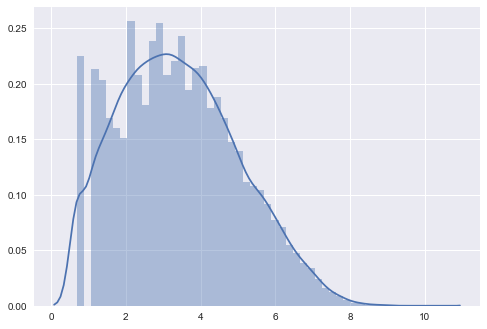

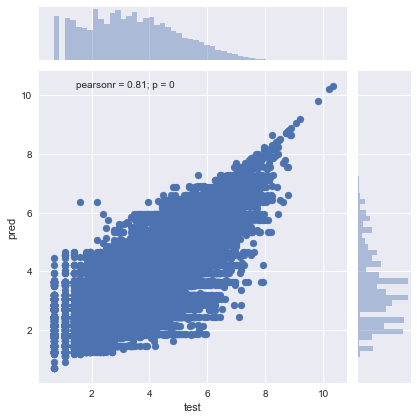

In [24]:
df = pd.DataFrame()
df['test'] = share_cv_y_test
df['pred'] = share_cv_y_pred

import seaborn as sns
sns.set(color_codes=True)
sns.distplot(share_cv_y_test)
sns.jointplot(x="test", y="pred", data=df)

In [25]:
test = df['test']
pred = df['pred']

######
accuracy = metrics.r2_score(test, pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(test, pred)/np.mean(test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(test))
np.percentile(df['test'], 10), np.percentile(df['test'], 50), np.percentile(df['test'], 90)

percentile_10 = np.percentile(df['test'], 10)
percentile_50 = np.percentile(df['test'], 50)
percentile_90 = np.percentile(df['test'], 90)

R2:  0.657675207722
Error (\100):  0.212635585218
Mean:  3.418562124235156


In [26]:
test = df[df['test'] > percentile_10]['test']
pred = df[df['test'] > percentile_10]['pred']

######
accuracy = metrics.r2_score(test, pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(test, pred)/np.mean(test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(test))

R2:  0.614145344592
Error (\100):  0.179613418262
Mean:  3.7530623606125135


In [27]:
test = df[df['test'] < percentile_90]['test']
pred = df[df['test'] < percentile_90]['pred']

######
accuracy = metrics.r2_score(test, pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(test, pred)/np.mean(test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(test))

R2:  0.508822769259
Error (\100):  0.232892050981
Mean:  3.0864957119646


In [28]:
test = df[df['test'] <= 26]['test']
pred = df[df['test'] <= 26]['pred']

######
accuracy = metrics.r2_score(test, pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(test, pred)/np.mean(test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(test))

R2:  0.657675207722
Error (\100):  0.212635585218
Mean:  3.418562124235156


R2:  0.779841664155
Error (\100):  0.516329923125
Mean:  118.348990173
Shares!
R2:  0.779658862269
Error (\100):  0.398451498565
Mean:  10139.2730016
Clicks!


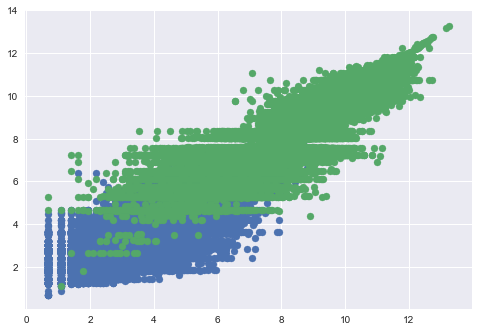

In [29]:
##share
# share_cv_y_test
# share_cv_y_pred

# accuracy = metrics.r2_score(share_cv_y_test, share_cv_y_pred)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(share_cv_y_test, share_cv_y_pred)/np.mean(share_cv_y_test)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(share_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))
print('Shares!')
plt.scatter(share_cv_y_test, share_cv_y_pred)

# accuracy = metrics.r2_score(clicks_cv_y_test, clicks_cv_y_pred)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(clicks_cv_y_test, clicks_cv_y_pred)/np.mean(clicks_cv_y_test)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(clicks_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)/np.mean(np.exp(clicks_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(clicks_cv_y_test)-1))

print('Clicks!')
plt.scatter(clicks_cv_y_test, clicks_cv_y_pred)

R2:  0.779841664155
Error (\100):  0.516329923125
Mean:  118.348990173
Shares!
R2:  0.779658862269
Error (\100):  0.398451498565
Mean:  10139.2730016
Clicks!


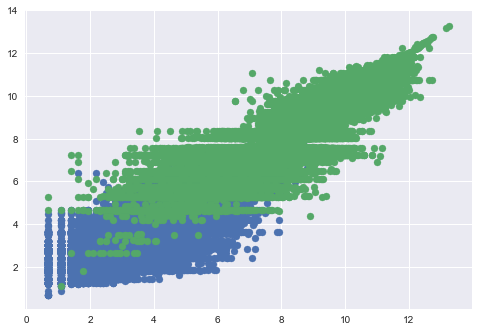

In [30]:
##share
# share_cv_y_test
# share_cv_y_pred

# accuracy = metrics.r2_score(share_cv_y_test, share_cv_y_pred)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(share_cv_y_test, share_cv_y_pred)/np.mean(share_cv_y_test)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(share_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))
print('Shares!')
plt.scatter(share_cv_y_test, share_cv_y_pred)

# accuracy = metrics.r2_score(clicks_cv_y_test, clicks_cv_y_pred)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(clicks_cv_y_test, clicks_cv_y_pred)/np.mean(clicks_cv_y_test)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(clicks_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)/np.mean(np.exp(clicks_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(clicks_cv_y_test)-1))

print('Clicks!')
plt.scatter(clicks_cv_y_test, clicks_cv_y_pred)